# Sound & velocity

*Imports and data_folder access*

In [308]:
import pickle
import numpy as np
from pathlib import Path
import glob
import pandas as pd
import matplotlib.pyplot as plt

# switch the path to represent the correct directory when switching devices and fetch the latest repo from github
# Marc_PC
data_folder_1 = Path(r"C:\Users\marc_\OneDrive\Documents\Studie\Master\Master Internship 1 Neurophysics\Project-collective-cortical-dynamics-with-non-linear-dimensionality-reduction\data")
data_folder_2 = Path(r"Z:\davide\2p_data\441394_ribolla")
data_folder_3 = Path(r"Z:\davide\2p_data\441406_fiano")

# Amber_laptop
#data_folder_1 = Path(r"C:\Users\renek\OneDrive\Documenten\Marc Studiemap\Master Internship 1\Project-collective-cortical-dynamics-with-non-linear-dimensionality-reduction\data")
#data_folder_2 = Path(r"Z:\davide\2p_data\441394_ribolla")
#data_folder_3 = Path(r"Z:\davide\2p_data\441406_fiano")

In [309]:
# Path to where the data is on your machine.
data_path_1 = data_folder_1.joinpath('20230211')

# ribolla files
data_path_2 = data_folder_2.joinpath('20230315')
data_path_3 = data_folder_2.joinpath('20230324')
data_path_4 = data_folder_2.joinpath('20230331')
data_path_5 = data_folder_2.joinpath('20230404')
data_path_6 = data_folder_2.joinpath('20230405')

# fiano files
data_path_7 = data_folder_3.joinpath('20230309')
data_path_8 = data_folder_3.joinpath('20230317')
data_path_9 = data_folder_3.joinpath('20230323')
data_path_10 = data_folder_3.joinpath('20230328')
data_path_11 = data_folder_3.joinpath('20230331')

# Create a list to store all the data paths
all_data_paths = [
    data_path_1,
    data_path_2,
    data_path_3,
    data_path_4,
    data_path_5,
    data_path_6,
    data_path_7,
    data_path_8,
    data_path_9,
    data_path_10,
    data_path_11
]

In [610]:
import sys
sys.path.append('../src') # Add src folder to path.
import file_management as fm # Import my file_management functions from /src.

selected_data_session = all_data_paths[1] # select one of the sessions! 0-10
fm.get_files_in_data_path(selected_data_session)

['Z:\\davide\\2p_data\\441406_fiano\\20230331\\behaviour_data.pickle',
 'Z:\\davide\\2p_data\\441406_fiano\\20230331\\cnmf.hdf5',
 'Z:\\davide\\2p_data\\441406_fiano\\20230331\\decoded_log.mat',
 'Z:\\davide\\2p_data\\441406_fiano\\20230331\\metrics.pickle',
 'Z:\\davide\\2p_data\\441406_fiano\\20230331\\neural_data.pickle',
 'Z:\\davide\\2p_data\\441406_fiano\\20230331\\parameters.yml',
 'Z:\\davide\\2p_data\\441406_fiano\\20230331\\tif_header.pickle',
 'Z:\\davide\\2p_data\\441406_fiano\\20230331\\trial_data.csv']

In [611]:
selected_data_session

WindowsPath('Z:/davide/2p_data/441406_fiano/20230331')

In [612]:
import os

# List all the files in the selected data session
files = os.listdir(selected_data_session)
print(files)

['behaviour_data.pickle', 'cnmf.hdf5', 'decoded_log.mat', 'metrics.pickle', 'neural_data.pickle', 'parameters.yml', 'tif_header.pickle', 'trial_data.csv']


*Trial Matrix*

In [613]:
# Update the trial_data_file and read the CSV file (accessing a specific file within the selected data session)
trial_data_file = selected_data_session.joinpath('trial_data.csv')
trial_data = pd.read_csv(trial_data_file)
#trial_data

*Behavioural Data*

In [614]:
# Load behavioural data.
bdata_file = selected_data_session.joinpath('behaviour_data.pickle')
with open(bdata_file,'rb') as file:
    b_data = pickle.load(file)

In [615]:
position = b_data['position']
pos_list = []
for i in range(len(trial_data)):
    row = trial_data.iloc[i]
    onset = row['env_onset'].astype(int)
    offset = row['tunnel2_offset']

    pos_segment = position[onset:offset]
    print(f'{i}: {np.max(pos_segment)-np.min(pos_segment)}')
    # normalize
    pos_segment = (pos_segment - np.min(pos_segment))/(np.max(pos_segment)-np.min(pos_segment))
    pos_list.append(pos_segment)

0: 1259
1: 2354
2: 2101
3: 2097
4: 2223
5: 2177
6: 2201
7: 2053
8: 2149
9: 2149
10: 2251
11: 2098
12: 2152
13: 2205
14: 2246
15: 2450
16: 2447
17: 2204
18: 2349
19: 2390
20: 2449
21: 2551
22: 2306
23: 2297
24: 2505
25: 2498


In [616]:
# Insight into what the behavioural data contains.
for k in b_data.keys():
    print(f'{k} with shape: {b_data[k].shape}')

time with shape: (1707552,)
position with shape: (1707552,)
lick_onsets with shape: (1515,)
lick_offsets with shape: (1515,)
reward_onsets with shape: (26,)
reward_offsets with shape: (26,)


In [617]:
#b_data['lick_offsets'][:-1]-b_data['lick_onsets']

In [618]:
import sys
sys.path.append('../src') # Add src folder to path.

import sound_velocity_analysis as sva # Import my sound velocity analysis functions from /src.
import histogram_analysis as ha # Import my histogram analysis functions from /src.

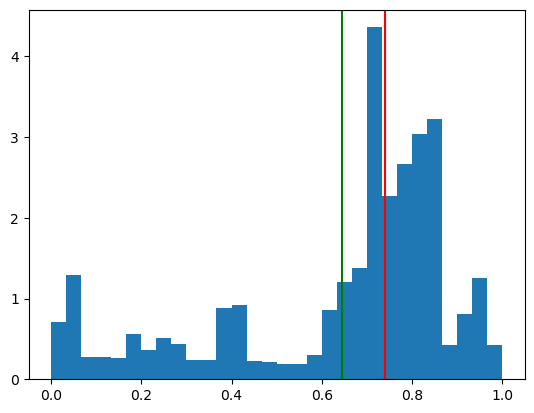

In [619]:
position = b_data['position']
rz_onsets = []
tunnel1_onsets = []
for i in range(len(trial_data)):
    row = trial_data.iloc[i]
    onset = row['env_onset'].astype(int)
    offset = row['tunnel2_offset']

    pos_segment = position[onset:offset]
    min_pos = np.min(pos_segment)
    max_pos = np.max(pos_segment)

    rz_pos = ha.compute_feature_position(row['reward_zone_onset'],position,min_pos,max_pos)
    rz_onsets.append(rz_pos)

    t1_pos = ha.compute_feature_position(row['tunnel1_onset'],position,min_pos,max_pos)
    tunnel1_onsets.append(t1_pos)
    
    #normalize
    pos_segment = (pos_segment - np.min(pos_segment))/(np.max(pos_segment)-np.min(pos_segment))

    if i==0:
        norm_pos = pos_segment
    else:
        norm_pos = np.hstack([norm_pos,pos_segment])

plt.hist(norm_pos,bins=30,density=True);
plt.axvline(x=np.mean(rz_onsets),c='r')
plt.axvline(x=np.mean(tunnel1_onsets),c='g')

# Goal 3: velocity analysis of mice movement

## Using scipy statistics and gaussian filter (1 dimensional)
Calculating velocity using position (in frames) and time (as dt in Hz)

In [620]:
from scipy.ndimage import gaussian_filter1d
dt = 1./1000. # Frequency of the recording apparatus is 1000 Hz.
pos = gaussian_filter1d(b_data['position'].astype(float),sigma=2) # Can vary with sigma value for additional smoothing.
vel = np.diff(pos.astype(float)) # Calculate the n-th discrete difference along the given axis.
vel = gaussian_filter1d(vel,50)

array([0.        , 0.        , 0.        , ..., 0.12783997, 0.1278422 ,
       0.12784337])

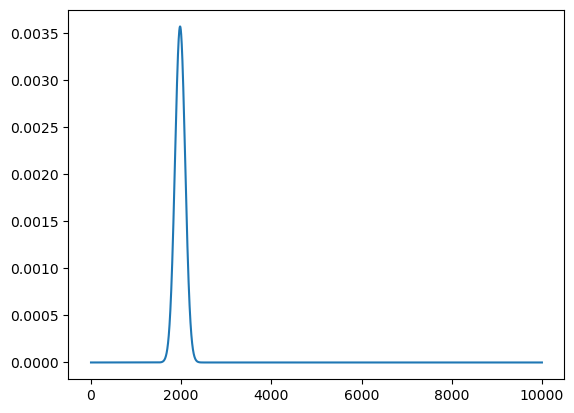

In [621]:
plt.plot(gaussian_filter1d(vel[:10000],100))
vel

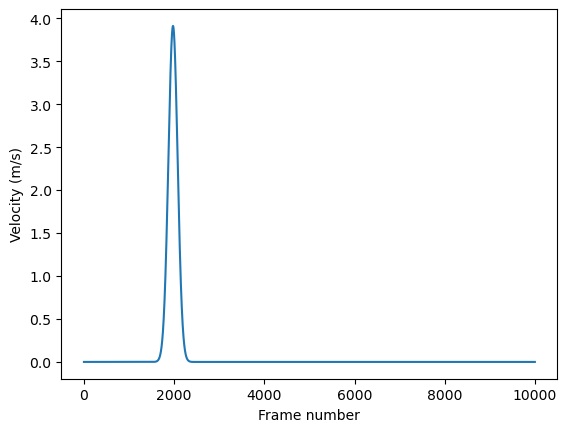

array([0.        , 0.        , 0.        , ..., 0.12783997, 0.1278422 ,
       0.12784337])

In [622]:
vel_data = sva.compute_velocity(b_data, pos_sigma=2, vel_sigma=20, vel_win=10000, vel_smooth=100)
vel

In [623]:
vel = vel[:len(norm_pos)]

In [624]:
len(norm_pos)

1682601

In [625]:
len(vel)

1682601

It's important to note that selecting too few bins can oversimplify the data and obscure important patterns, while selecting too many bins can make it difficult to interpret the results and can lead to overfitting.

In [626]:
from scipy.stats import binned_statistic # Import a function from a library module.
nbins=50 # Number of bins.
avg_vel,edges,_ = binned_statistic(norm_pos,vel,bins=nbins) # Use _ (underscore) to have a function return a value in an unused character to avoid error.
centers = [(edges[i+1]+edges[i])/2 for i in range(len(edges)-1)] # The centers represent the midpoint of each bin. The edges represent the boundaries of each bin.

This code is creating a binned scatter plot of the relationship between position and velocity, where each bin represents a range of positions and the average velocity in that range is represented by a point on the plot. The graph can be used to visualize any trends or patterns in the relationship between position and velocity.

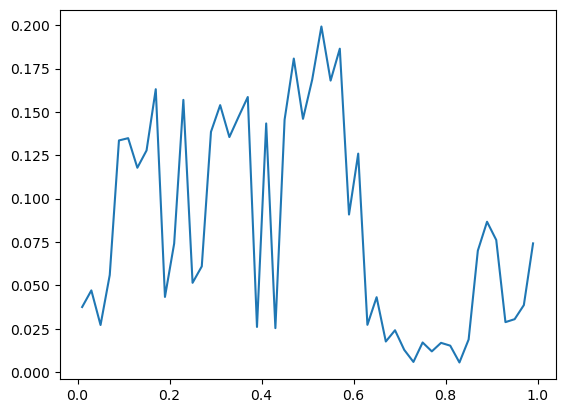

In [627]:
plt.plot(centers,avg_vel) # What is this plot again? Ask Davide!

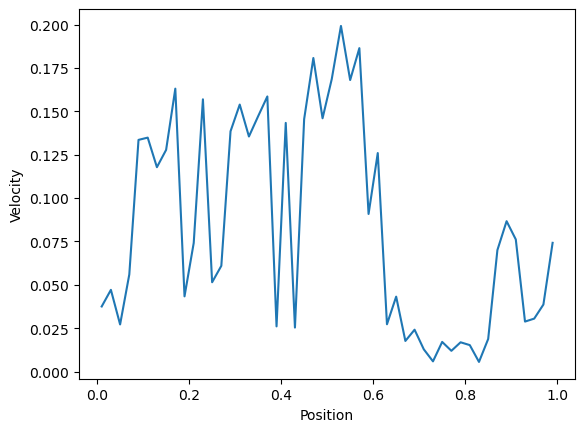

In [628]:
sva.pos_vel_scatterplot(norm_pos, vel, nbins=50)

# Goal 4: Effect of sound on Velocity

Compute the effect of sound on the speed:
- For every trial take sound onset T, and chunk the speed timecourse from T-2 seconds to T+2 seconds.
- Use binned_statistic to make a time-speed histogram (time ad x, speed as values)
- append the values of this histogram to a list of lists, at the end this will have shape (n_trials x n_bins )
- Average over trial to get the average speed in each bin, and plot it with plot()
- You can also compute the standard deviation over trials, and have it as a confidence interval using the fill_between() plotting function

Speed around sound onset:
- cycle over the trials
- take the sound onset
- compute start = sound onset - 2000 and end = sound_onset + 2000
- take vel[start:end] (the velocity array in this interval) and store it in another array 'velocity' with hstack, as we did with norm_pos
- store in a 'times' array the corresponding times relative to sound onset, this will be every time the same and can be done with np.linspace(-2000,-2000)
- use binned_statistic with 'times' as x and 'velocities' as value
- plot the result like we did for the case of velocity vs position. Here the zero value will be the sound onset

In [629]:
# Define compute start & end.
t_on = 2000
t_off = 4000

# Initialize the velocity matrix and count variable.
vel_matrix = np.zeros((len(trial_data), t_on + t_off))
count = 0

# Cycle over the trials using integer indexing.
for i in range(len(trial_data)):
    
    # Get the current trial row.
    row = trial_data.iloc[i] 

    # The timecourse of interest for the velocity.
    if not np.isnan(row['sound_onset']):
        onset = row['sound_onset'].astype(int) - t_on # 2 seconds before.
        offset = row['sound_onset'].astype(int) + t_off # 2 seconds after.
        trial_vel = vel[onset:offset]
        #print(len(trial_vel))
        if i == 0: # Compared to hstack, vstack requires slices of equal length.
            vel_matrix = trial_vel
        else:
            vel_matrix = np.vstack([vel_matrix,trial_vel])
print(vel_matrix.shape) # Shape should be: (number of trials, t_on + t_off).

(46, 6000)


- In the above function, the count variable is initialized before the loop and incremented within the if block for each valid trial. This ensures that the count variable is always defined when it is referenced, even if some rows are skipped. Required in order to avoid NaNs in the trial_matrix data.
- I excluded np.vstack in the generated function because it's not necessary to use it in this case. Instead of concatenating arrays vertically, we can initialize an array of zeros with the desired shape (vel_matrix = np.zeros((len(trial_matrix), t_on + t_off))) and then fill it in with the velocity values for each trial using integer indexing (vel_matrix[i,:] = trial_vel). This is more memory-efficient than concatenating arrays vertically with np.vstack and ensures that each row of the resulting vel_matrix has the same length (t_on + t_off).

In [630]:
vel_matrix = sva.computed_sliced_matrix(trial_data, vel, 2000, 4000)
vel_matrix.shape

(20, 6000)

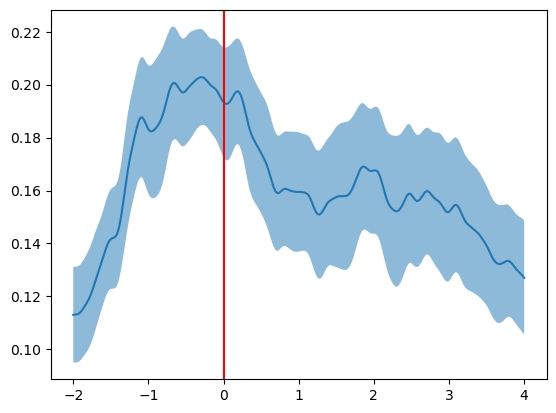

In [631]:
save_folder = Path(r"C:\Users\marc_\OneDrive\Documents\Studie\Master\Master Internship 1 Neurophysics\Project-collective-cortical-dynamics-with-non-linear-dimensionality-reduction\plots\average_velocity_plots")
avg_vel, std_vel, sem_vel = sva.avg_std_sem_velocity(vel_matrix, t_on, t_off, selected_data_session, save_folder)

In [632]:
print(avg_vel)
print(std_vel)
print(sem_vel)

[0.11300583 0.11301391 0.11302161 ... 0.12708948 0.12705051 0.12701135]
[0.07841865 0.0784428  0.07846639 ... 0.09357066 0.09356117 0.09355027]
[0.01799047 0.01799601 0.01800142 ... 0.02146658 0.0214644  0.0214619 ]


# Goal 5: Compute the t test between the speed distribution before the sound onset and the speed distribution after
- take the vel_matrix
- compute two matrices vel_before and vel_after, by slicing vel_matrix at the sound onset (t_on tells you the index to use)
- flatten the matrices into 1d arrays
- compute the t-test on the two arrays with ttest_ind(a,b) (see documentation in slack)

In [633]:
vel_matrix

array([[0.12622272, 0.12622858, 0.12623946, ..., 0.29936647, 0.29931646,
        0.29926353],
       [0.09647341, 0.0967245 , 0.09697799, ..., 0.17762623, 0.17731726,
        0.17700513],
       [0.02081838, 0.02110971, 0.02140181, ..., 0.17654248, 0.17665091,
        0.17674952],
       ...,
       [0.1231686 , 0.12352277, 0.12388379, ..., 0.11440431, 0.11441869,
        0.11442994],
       [0.15049246, 0.15028647, 0.15007266, ..., 0.        , 0.        ,
        0.        ],
       [0.32039114, 0.32067065, 0.32094591, ..., 0.16642264, 0.16635285,
        0.16628351]])

the ttest_ind function from the scipy.stats module to compute the two-sample t-test between the flattened vel_before and vel_after arrays. The ttest_ind function returns two values: the t-statistic t_stat and the p-value p_val. The t-statistic measures the difference between the means of the two groups relative to the variation within the groups, and the p-value measures the probability of observing such a difference between the groups by chance alone.

- The t-test result between the speed distribution before the sound onset and the speed distribution after the sound onset provides a statistical test for whether the two distributions are significantly different from each other.

- Specifically, the t-test provides a way to evaluate the null hypothesis that there is no significant difference between the means of the two distributions. If the p-value resulting from the t-test is less than a chosen significance level (often 0.05), we reject the null hypothesis and conclude that there is a significant difference between the speed distributions before and after the sound onset.

- In the context of the function ttest_speed_distribution in the provided code, a significant t-test result could suggest that there is a change in the velocity of a certain behavior before and after the onset of a sound stimulus.

- (p < {:.4f})" is a string that contains a format specifier, {:4f}, which specifies a placeholder for a floating-point number with 4 decimal places. The {} are placeholders for the value that will be filled in using the .format() method.
format(alpha) is a method that formats the value of the alpha variable as a string and replaces the {} placeholder in the format string with the formatted value.

In [634]:
sva.ttest_speed_distribution(vel_matrix, 2000)

The difference between the speed distributions before and after the sound onset is statistically significant (p < 0.0500)


(20.328156166119275, 1.0353463746613172e-91)